In [3]:
# This program calculates the crossed and open positions of a Grashof four bar linkage.
# Create a directory on your pc with the name fourbar_pics so the program can save a gif and pictures there.

To be Completed:
- explain code better and how to use this program
- make code more readable and use better practices
- do velocity, acceleration, and force analysis
- update gui as needed for above upgrades
- Update so it also outputs crossed solution as well
- have output look better as well.
- have pictures for gif only in ram, not on physical location on computer?

Changelog:
Rev 1.0:
- Basic functionality accomplished. Only outputs open data though.

Resources:
https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [5]:
import numpy as np
import plotly
import plotly.graph_objs as go
import pandas as pd
from IPython.display import Image
#from IPython.display import display, HTML
import math
import ipywidgets as widgets
import imageio as io
import os
import matplotlib
matplotlib.use('Agg') # won't putput a graph if just add data to a figure
import matplotlib.pyplot as plt

In [6]:
def positionAnalysis(a, b, c, d, theta2):
    
    # Don't use atan2? P176
    #Do these once for a simulation (theta2 doesnt change these parameters)
    k1 = d/a
    k2 = d/c
    k3 = ( math.pow(a,2) - math.pow(b,2) + math.pow(c,2) + math.pow(d,2) ) / ( 2*a*c )

    A = math.cos(theta2) - k1 - k2*math.cos(theta2) + k3
    B = -2*math.sin(theta2)
    C = k1 - (k2 + 1)*math.cos(theta2) + k3

    theta4Open = 2*math.atan( ( -B - math.sqrt( math.pow(B,2) - 4*A*C ) ) / (2*A) )
    theta4Crossed = 2*math.atan( ( -B + math.sqrt( math.pow(B,2) - 4*A*C ) ) / (2*A) )

    #do these once as well
    k4 = d/b
    k5 = ( math.pow(c,2) - math.pow(d,2) - math.pow(a,2) - math.pow(b,2) ) / ( 2*a*b )

    D = math.cos(theta2) - k1 + k4*math.cos(theta2) + k5
    E = -2*math.sin(theta2)
    F = k1 + (k4 - 1)*math.cos(theta2) + k5

    theta3Open = 2*math.atan( ( -E - math.sqrt( math.pow(E,2) - 4*D*F ) ) / (2*D) )
    theta3Crossed = 2*math.atan( ( -E + math.sqrt( math.pow(E,2) - 4*D*F ) ) / (2*D) )
    
    return theta3Open, theta4Open, theta3Open, theta3Crossed

In [7]:
def plotLinkage(a_x, a_y, b_x, b_y, link_d):
    d_x = link_d
    d_y = 0
    plt.plot( [ 0  , a_x ], [ 0  , a_y ] )
    plt.plot( [ a_x, b_x ], [ a_y, b_y ] )
    plt.plot( [ b_x, d_x ], [ b_y, d_y ] )
    #plt.save()

In [8]:
def makePictures(df, d):
    i = 1000
    fig = plt.figure()

    minValuesX = [0, df['a_x'].min(),df['b_x'].min(), d]
    minValuesY = [0, df['a_y'].min(),df['b_y'].min()]
    minValueX = min(minValuesX)
    minValueY = min(minValuesY)
    maxValuesX = [0, df['a_x'].max(),df['b_x'].max(), d]
    maxValuesY = [0, df['a_y'].max(),df['b_y'].max()]
    maxValueX = max(maxValuesX)
    maxValueY = max(maxValuesY)

    for row in df.itertuples():
        plt.clf()
        ax = fig.add_subplot(1,1,1)
        plotLinkage( getattr(row, 'a_x'), getattr(row,'a_y'), getattr(row, 'b_x'), getattr(row, 'b_y'), link_d = d)
        ax.set_xlim([minValueX,maxValueX])
        ax.set_ylim([minValueY, maxValueY])
        plt.savefig('fourbar_pics/'+'open' + str(i) + '.png')
        i = i + 1

In [9]:
def makeGif():
# https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python
    file_names = sorted((fn for fn in os.listdir('./fourbar_pics') if fn.startswith('open')))
    #making animation
    with io.get_writer('./fourbar_pics/openGrashof1.gif', mode='I', duration = .33) as writer:
        for filename in file_names:
            image = io.imread('./fourbar_pics/' + filename)
            writer.append_data(image)
    writer.close()

In [10]:
# Vectorized Calculation for Position over a rotation

def positionSimulation(a, b, c, d, step = .01):
    startAngle = 0
    stopAngle = 2*math.pi

    theta2 = np.arange(start = startAngle, stop = stopAngle, step = step)
    zeros = np.zeros(theta2.size)
    dataSeries = {'A':zeros, 'B': zeros, 'C':zeros, 'D':zeros, 'E':zeros, 'F':zeros,
         'theta2': theta2, 'theta4Open': theta2, 'theta4Crossed': theta2,
         'theta3Open': theta2, 'theta3Crossed': theta2}
    df = pd.DataFrame(data=dataSeries)

    #Do these once for a simulation (theta2 doesnt change these parameters)
    k1 = d/a
    k2 = d/c
    k3 = ( math.pow(a,2) - math.pow(b,2) + math.pow(c,2) + math.pow(d,2) ) / ( 2*a*c )
    k4 = d/b
    k5 = ( math.pow(c,2) - math.pow(d,2) - math.pow(a,2) - math.pow(b,2) ) / ( 2*a*b )

    # Scalar math to the matrix
    df['A'] = (np.cos(df['theta2']) - k1 - k2*np.cos(df['theta2']) + k3)
    # df B is true to value...
    df['B'] = (-2*np.sin(df['theta2']))
    df['C'] = (k1 - (k2 + 1)*np.cos(df['theta2']) + k3)

    df['theta4Open'] = 2*np.arctan( ( -df['B'] - np.sqrt( np.power(df['B'],2) - 4*df['A']*df['C'] ) ) / (2*df['A']) )
    df['theta4Crossed'] = 2*np.arctan( ( -df['B'] + np.sqrt( np.power(df['B'],2) - 4*df['A']*df['C'] ) ) / (2*df['A']) )

    df['D'] = np.cos(theta2) - k1 + k4*np.cos(theta2) + k5
    df['E'] = -2*np.sin(theta2)
    df['F'] = k1 + (k4 - 1)*np.cos(theta2) + k5

    df['theta3Open'] = 2*np.arctan( ( -df['E'] - np.sqrt( np.power(df['E'],2) - 4*df['D']*df['F'] ) ) / (2*df['D']) )
    df['theta3Crossed'] = 2*np.arctan( ( -df['E'] + np.sqrt( np.power(df['E'],2) - 4*df['D']*df['F'] ) ) / (2*df['D']) )
    #df.loc[df['theta2']== .698]
    #df.loc[689]

    df['a_x'] = a*np.cos(df['theta2'])
    df['a_y'] = a*np.sin(df['theta2'])

    df['b_x'] = df['a_x'] + b*np.cos(df['theta3Open'])
    df['b_y'] = df['a_y'] + b*np.sin(df['theta3Open'])

    #df['c_x'] = df['d_x'] + c*math.cos(theta4Open)
    #df['c_y'] = df['d_y'] + c*math.sin(theta4Open)
    #seeing if this == b_x could be a test for the code?
    
    #df['d_x'] = d
    #df['d_y'] = 0

    return df

,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.129011,-1.285575,1.3389,-3.137252,-1.285575,0.330659,0.698132,-1.064266,0.354265,-1.710509,1.000508,30.641778,25.711504,143.189988,67.339624


,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.129011,-1.285575,1.3389,-3.137252,-1.285575,0.330659,0.698132,-1.064266,0.354265,-1.710509,1.000508,30.641778,25.711504,143.189988,67.339624


,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.129011,-1.285575,1.3389,-3.137252,-1.285575,0.330659,0.698132,-1.064266,0.354265,-1.710509,1.000508,30.641778,25.711504,143.189988,67.339624


,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.121819,-1.35118,1.403626,-3.189992,-1.35118,0.335454,0.741765,-1.07951,0.347516,-1.745403,1.013409,29.491093,27.023608,142.317691,67.891185


,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.121819,-1.35118,1.403626,-3.189992,-1.35118,0.335454,0.741765,-1.07951,0.347516,-1.745403,1.013409,29.491093,27.023608,142.317691,67.891185


,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.121819,-1.35118,1.403626,-3.189992,-1.35118,0.335454,0.741765,-1.07951,0.347516,-1.745403,1.013409,29.491093,27.023608,142.317691,67.891185


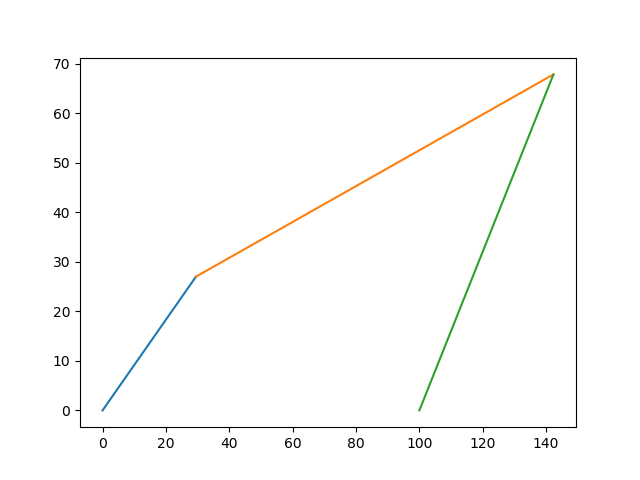

,A,B,C,D,E,F,theta2,theta3Crossed,theta3Open,theta4Crossed,theta4Open,a_x,a_y,b_x,b_y
1,-2.121819,-1.35118,1.403626,-3.189992,-1.35118,0.335454,0.741765,-1.07951,0.347516,-1.745403,1.013409,29.491093,27.023608,142.317691,67.891185


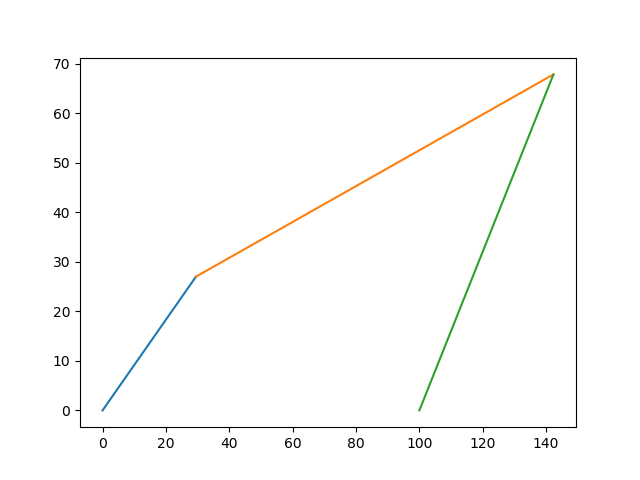

In [11]:
gifToggle = widgets.ToggleButtons(
    options=['Create Gif', "Don't Create Gif"],
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=["The program won't create a gif", 'Have the program create a gif'],
)

linkATextBox = widgets.BoundedFloatText(
    value=40,
    min=0,
    max=10000000.0,
    #step=0.1,
    description='',
    disabled=False
)
linkATextBoxOutput = widgets.HBox([widgets.Label(value="Length of Link a:"), linkATextBox, widgets.Label(value = "mm")])

linkBTextBox = widgets.BoundedFloatText(
    value=120,
    min=0,
    max=10000000.0,
    #step=0.1,
    description='',
    disabled=False
)
linkBTextBoxOutput = widgets.HBox([widgets.Label(value="Length of Link b:"), linkBTextBox, widgets.Label(value = "mm")])

linkCTextBox = widgets.BoundedFloatText(
    value=80,
    min=0,
    max=10000000.0,
    #step=0.1,
    description='',
    disabled=False
)
linkCTextBoxOutput = widgets.HBox([widgets.Label(value="Length of Link c:"), linkCTextBox, widgets.Label(value = "mm")])

linkDTextBox = widgets.BoundedFloatText(
    value=100,
    min=0,
    max=10000000.0,
    #step=0.1,
    description='',
    disabled=False
)
linkDTextBoxOutput = widgets.HBox([widgets.Label(value="Length of Link d:"), linkDTextBox, widgets.Label(value = "mm")])

theta2TextBox = widgets.BoundedFloatText(
    value=40,
    min=0,
    max = 10000000.0,
    #step=0.1,
    description='',
    disabled=False
)
theta2TextBoxOutput = widgets.HBox([widgets.HTML(
    value="&Theta;<sub>2</sub>",
    placeholder='theta2',
    description='',
), theta2TextBox, widgets.Label(value = "degrees")])

def onClickCalcButton(b):
    main(
        theta2 = theta2TextBox.value,
        a = linkATextBox.value,
        b = linkBTextBox.value,
        c = linkCTextBox.value,
        d = linkDTextBox.value,
        gifToggle = gifToggle.value)
    
calcButton = widgets.Button(
    description='Run Calculation',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
calcButton.on_click(onClickCalcButton) # This automatically passes the button object to the called function

inputCalcSettings = widgets.VBox([theta2TextBoxOutput, linkATextBoxOutput, linkBTextBoxOutput,
                                  linkCTextBoxOutput, linkDTextBoxOutput])
prgSettings = widgets.VBox([gifToggle, calcButton])
widgets.VBox([inputCalcSettings, prgSettings])

In [17]:
def main(a, b, c, d, theta2, gifToggle):
    theta2 = math.radians(theta2)
    #print(a, b, c, d, theta2, gifToggle)
    d_x = d
    d_y = 0
    
    if gifToggle == 'Create Gif':
        df = positionSimulation(a, b, c, d, theta2)
        makePictures(df, d)
        makeGif()
    else:
        df = positionSimulation(a, b, c, d, theta2)

        linkPosition = df.loc[df['theta2'] == theta2]   # create a series from the simulation dataframe that has the information for the case requested by the user
        fig = plt.figure()
        plotLinkage(linkPosition['a_x'].item(), linkPosition['a_y'].item(),linkPosition['b_x'].item(), linkPosition['b_y'].item(),d)
        plt.savefig('fourbar_pics/'+'linkPos' + '.png')
        Image('fourbar_pics/linkPos.png')
        display(linkPosition, Image('fourbar_pics/linkPos.png'))
        

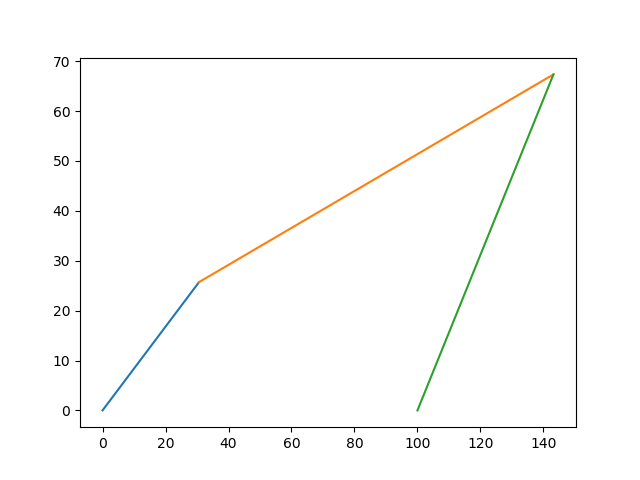